In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [12]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)

In [13]:
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [4]:
image_paths = glob.glob("Plate_examples/*")
print("Found %i images..."%(len(image_paths)))


Found 20 images...


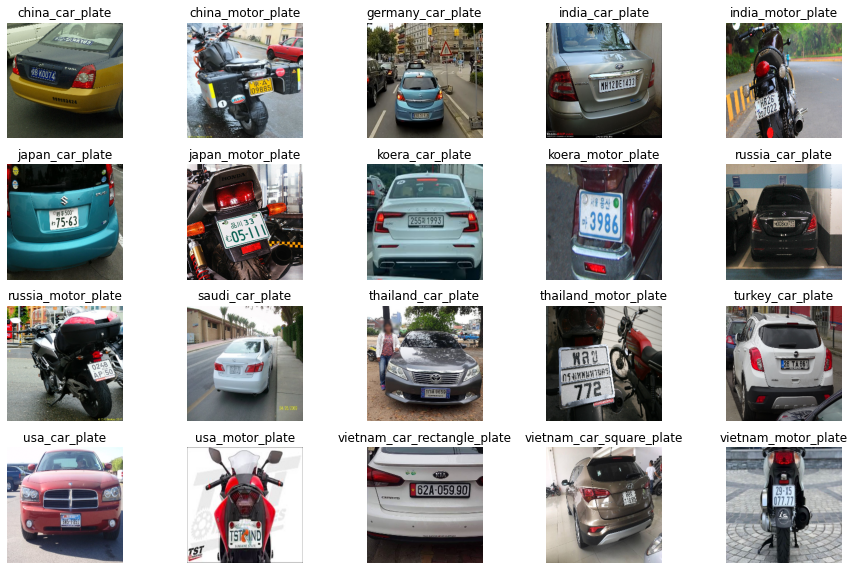

In [5]:
def preprocess_image(image_path,resize=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255
    if resize:
        img = cv2.resize(img, (224,224))
    return img

fig = plt.figure(figsize=(12,8))
cols = 5
rows = 4
fig_list = []
for i in range(cols*rows):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_paths[i],True)
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout(True)
plt.show()


In [11]:
Dmax = 608
Dmin = 288
vehicle = preprocess_image(image_paths[5])

ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)


_ , LpImg, _, ptsh = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
print("Detect %i plate(s)"%len(LpImg))
print(ptsh[:2])

Detect 1 plate(s)
[[362.03365834 624.24981625 635.17111219 372.95495428]
 [309.45115063 284.85626462 412.16552976 436.76041576]]


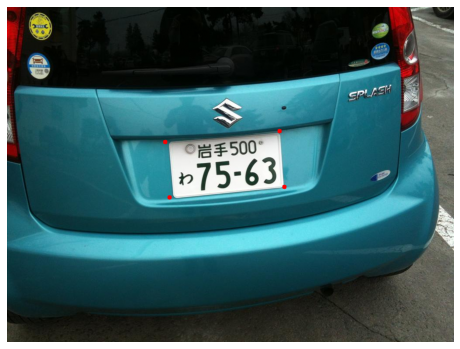

In [7]:
x_list = ptsh[0]
y_list = ptsh[1]      

for i in range(4):
    cv2.circle(vehicle,(int(x_list[i]),int(y_list[i])),5,(255,0,0),-1)

plt.figure(figsize=(8,8))
plt.axis(False)
plt.imshow(vehicle)